# Quantitative Methods for Finance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Matplotlib styles
plt.style.use('ggplot')
plt.rcParams.update({
    'figure.figsize': (15, 4),
    'axes.prop_cycle': plt.cycler(color=["#4C72B0", "#C44E52", "#55A868", "#8172B2", "#CCB974", "#64B5CD"]),
    'axes.facecolor': "#EAEAF2"
})

## Question 1

## Question 2

In [42]:
M_raw = pd.read_excel('data/Use_SUT_Framework_2007_2012_DET.xlsx', sheet_name="2012", skiprows=[0, 1, 2, 3, 4], engine='openpyxl', index_col=0)

# Asserts the type of the columns and indexes
M_raw.columns = M_raw.columns.astype('str')
M_raw.index = M_raw.index.astype('str')
M_raw = M_raw.fillna(0)

# Selects the requested columns and indexes
M = M_raw.loc[:'S00203', :'T001']

# Filters common elements
intersection = list(set(M.index).intersection(M.columns))
M = M.loc[intersection, intersection]

# Normalizes the M Matrix
M = M / M.sum(axis=0)

# Obtains vector D
inputs = M_raw.loc['T005', intersection]
outputs = M_raw.loc['T018', intersection]
D = (outputs - inputs).astype('float')

# Computes P
P = np.linalg.solve(np.eye(M.shape[0]) - M, D)

## Question 3

## Question 4

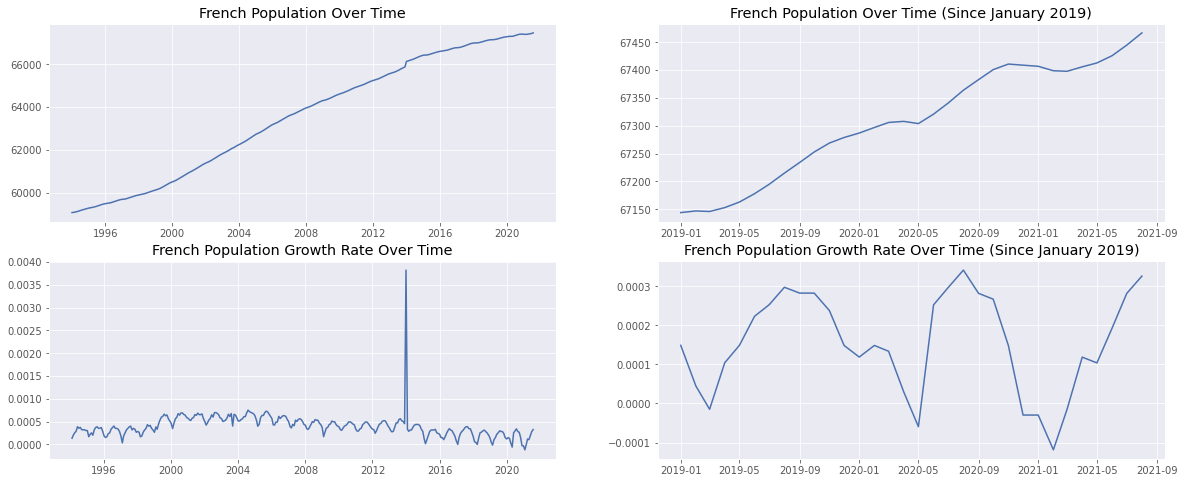

In [10]:
# To download the dataset, go to https://www.insee.fr/en/statistiques/serie/001641607#Telechargement
df = pd.read_csv("data/frenchpop.csv", sep=';', skiprows=[0, 1, 2, 3], usecols=[0, 1], names=['date', 'pop'], parse_dates=['date'])
df.sort_values('date', inplace=True)

# Calculates the population growth rate
df['growth_rate'] = df['pop'].pct_change()

# Plots the data
fig, axs = plt.subplots(2, 2, figsize=(20, 8))
axs[0, 0].plot(df['date'], df['pop'])
axs[0, 0].set_title("French Population Over Time")
axs[0, 1].plot(df[df['date'] >= '2019-01-01']['date'], df[df['date'] >= '2019-01-01']['pop'])
axs[0, 1].set_title("French Population Over Time (Since January 2019)")
axs[1, 0].plot(df['date'], df['growth_rate'])
axs[1, 0].set_title("French Population Growth Rate Over Time")
axs[1, 1].plot(df[df['date'] >= '2019-01-01']['date'], df[df['date'] >= '2019-01-01']['growth_rate'])
axs[1, 1].set_title("French Population Growth Rate Over Time (Since January 2019)")
plt.show()

Just by observing the first plot we can't really see a pandemic effect due to the scale in the y axis. If we instead plot a smaller interval (second plot) we can better interpret the effects of the COVID pandemic.

We could say that in the beginig of the pandemic (January 2020) the time series kept following its trend. in May 2020 we can observe a critical point where the french population starts to increase in a higher rate than in the begining of the year (but a normal rate for the end of the year when compared to the data from the same months in 2019). Around November 2020 the french population starts to decrease at a small rate (could be due to COVID, as in previous years we don't see an actual decrease in the population, only a smaller increase rate). Not much later, in March 2021 we can see that the population starts to increase again at the normal rate for the time period.

## Question 5

## Question 6